In [17]:
import os
import io
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

In [4]:
STUDENT_STAT_PATH = os.getcwd()

In [5]:
def percentage_to_float(x):
    if x=='':
        return 0
    else:
        return float(x.strip('%'))/100

In [6]:
def load_attendance_data(attendance_path=STUDENT_STAT_PATH):
    csv_file = os.path.join(attendance_path, 'stud-stat-anonymous.csv')
    return pd.read_csv(csv_file, converters={'Samlet fravær':percentage_to_float, 'Fravær':percentage_to_float, 'Fravær.1':percentage_to_float, 'Fravær.2':percentage_to_float, 'Fravær.3':percentage_to_float})

In [10]:
attendance = load_attendance_data()
attendance.head(100)

,Unnamed: 0,Id,Samlet fravær,Klasse,Fag,Fravær,Fag.1,Fravær.1,Fag.2,Fravær.2,Fag.3,Fravær.3
0,0,214366,1.000,Web and Soft Electives,Big Data,1.0000,NaN,0.0000,NaN,0.0000,NaN,0.0000
1,1,680092,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
2,2,906441,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
3,3,432875,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
4,4,146518,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
5,5,864755,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
6,6,464972,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
7,7,728877,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
8,8,419492,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
9,9,205702,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000


In [11]:
attendance.drop("Unnamed: 0", axis=1, inplace=True)

In [12]:
transform_func = dict(Fag=attendance.filter(regex="^Fag").columns, Fravær=attendance.filter(regex="^Fravær").columns)

In [14]:
transformed_attendance = pd.lreshape(attendance, transform_func)

In [16]:
transformed_attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 5 columns):
Id               645 non-null int64
Klasse           645 non-null object
Samlet fravær    645 non-null float64
Fag              645 non-null object
Fravær           645 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 25.3+ KB


In [19]:
absence_only = transformed_attendance.iloc[:, [2, 4]].values

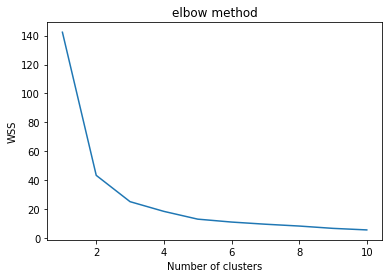

In [21]:
wss = [] 
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=5, random_state=0)
    kmeans.fit(absence_only)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=5, random_state=0)
y_kmeans=kmeans.fit_predict(absence_only)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1
 1 1 4 1 1 1 1 1 1 1 1 1 2 2 1 1 1 4 1 1 1 4 1 3 1 1 3 1 1 1 4 4 4 4 1 1 1
 1 3 1 1 3 1 1 1 1 3 1 1 4 4 4 4 4 1 3 1 1 4 3 1 3 1 1 3 3 3 3 3 4 3 1 4 1
 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 0 3 3 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0 3
 3 3 0 0 0 3 0 3 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 3 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 2 2 2 4 4 2 2 2 4 2
 2 4 1 1 2 2 1 1 4 4 1 2 1 4 4 1 4 1 1 1 4 4 4 4 1 3 4 1 4 3 3 1 1 1 1 4 3
 3 4 1 4 4 4 3 3 4 3 1 4 3 1 1 1 1 1 4 4 3 4 4 4 4 3 4 4 3 3 4 4 3 3 3 4 4
 4 0 0 3 3 3 0 0 0 3 3 0 3 0 3 0 0 0 0 0 3 1 0 3 0 0 3 3 3 3 3 3 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 4
 1 1 3 4 3 3 1 4 1 1 4 1 

Text(0.5, 1.0, 'culster of subjects')

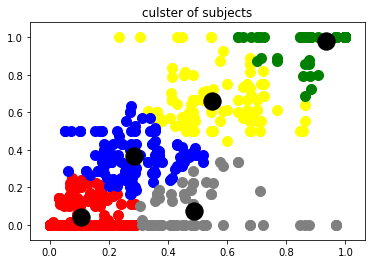

In [23]:
plt.scatter(absence_only[y_kmeans==0, 0], absence_only[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(absence_only[y_kmeans==1, 0], absence_only[y_kmeans==1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(absence_only[y_kmeans==2, 0], absence_only[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(absence_only[y_kmeans==3, 0], absence_only[y_kmeans==3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(absence_only[y_kmeans==4, 0], absence_only[y_kmeans==4, 1], s=100, c='grey', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('culster of subjects')